CONFIDENCE INTERVALS

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker7 yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.



In [1]:
import scipy.stats as stats
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
n = 130
mu = 98.25 # xbar
var = 0.73 # s
ci = 0.99

In [3]:
stats.norm.interval(0.99, loc=mu, scale=0.73/np.sqrt(130))
#n >30 dan sonra stats.t yerine stats.norm ile hesaplayabilirsin ama en dogru sonuc t ile alinan

(98.08508192246582, 98.41491807753418)

In [4]:
stats.t.interval(0.99, 129, loc=98.25, scale=0.73/np.sqrt(130))


(98.08260738705933, 98.41739261294067)

t*s/sqrt(n) --> marjin of error

EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [5]:
n = 500
mu = 5.4
var = 3.1
ci = 0.95

In [6]:
stats.norm.interval(0.95, loc=5.4, scale=3.1/np.sqrt(500))


(5.12827801242126, 5.67172198757874)

In [7]:
stats.t.interval(0.95, 499, loc=5.4, scale=3.1/np.sqrt(500))

(5.127617354510309, 5.672382645489692)

HYPOTHESIS TESTING

EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [8]:
mu = 13.2  # Population mean
sigma = 2.5  # sd of population
n = 40  # number of students
x_bar = 12.2  # sample mean

In [9]:
z = (x_bar - mu)/(sigma/sqrt(n))
z

-2.5298221281347035

In [10]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [11]:
alpha = 0.01

if p_value< alpha:
    print("Reject the Null")
else:
    print("Fail to reject the Null")


Reject the Null


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [12]:
df = pd.read_csv("soil - Sheet1.csv")
df

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [13]:
ttest_ind = stats.ttest_ind(df['Soil1'], df['Soil2'], equal_var=True, nan_policy='omit', alternative='two-sided')
ttest_ind


Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [14]:
alpha = 0.01

if ttest_ind.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject the Null")


Reject the Null


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [15]:
pisa = pd.read_csv("2015 PISA Test - Sheet1.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [16]:
pisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


df.describe() ---> Generate descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [17]:
pisa.shape

(70, 6)

In [18]:
pisa.groupby('Continent_Code').mean()

,internet_users_per_100,Math,Reading,Science
Continent_Code,,,,
AF,43.359918,363.212100,355.457400,381.074250
AS,68.455613,466.216647,454.059682,467.945847
EU,77.274888,477.981449,476.164608,478.299381
OC,86.391704,494.559750,506.085650,511.648700
SA,60.180494,402.887700,425.359229,421.747186


<Figure size 576x432 with 0 Axes>

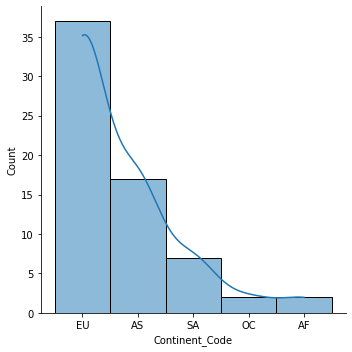

In [19]:
plt.figure(figsize=(8, 6))
sns.displot(data=pisa, x='Continent_Code', bins=20, kde=True);


In [20]:
df_eu = pisa[pisa['Continent_Code'] == 'EU']
df_as = pisa[pisa['Continent_Code'] == 'AS']
df_sa = pisa[pisa['Continent_Code'] == 'SA']
df_oc = pisa[pisa['Continent_Code'] == 'OC']
df_af = pisa[pisa['Continent_Code'] == 'AF']

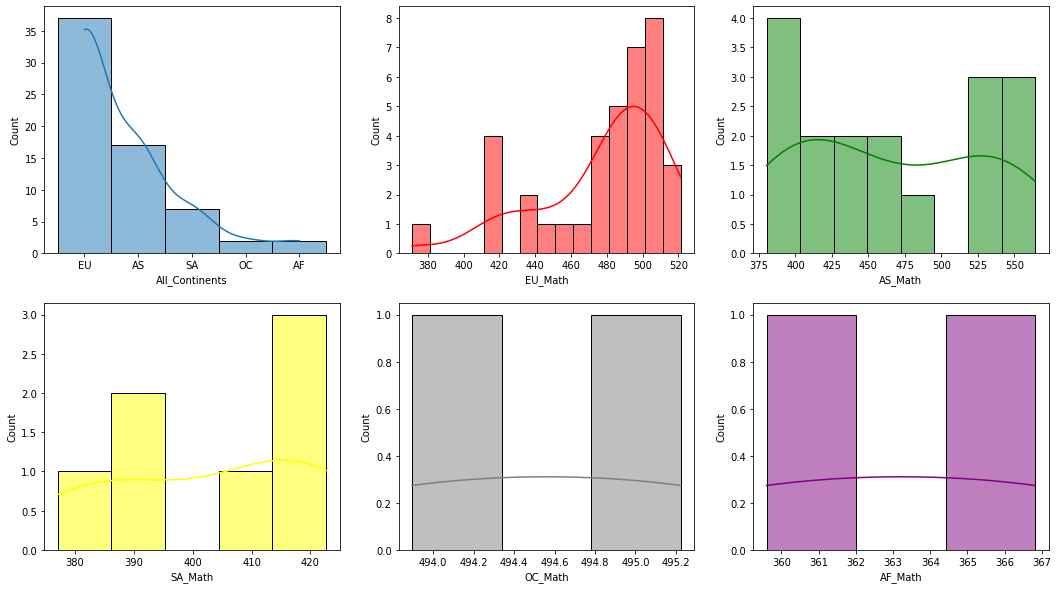

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(data=pisa, x='Continent_Code', bins=20, kde=True,
             ax=ax[0, 0]).set_xlabel('All_Continents')

sns.histplot(x=df_eu['Math'], bins=15, kde=True, color='red',
             ax=ax[0, 1]).set_xlabel('EU_Math')

sns.histplot(x=df_as['Math'], bins=8, kde=True, color='green',
             ax=ax[0, 2]).set_xlabel('AS_Math')

sns.histplot(x=df_sa['Math'], bins=5, kde=True, color='yellow',
             ax=ax[1, 0]).set_xlabel('SA_Math')

sns.histplot(x=df_oc['Math'], bins=3, kde=True, color='grey',
             ax=ax[1, 1]).set_xlabel('OC_Math')

sns.histplot(x=df_af['Math'], bins=3, kde=True, color='purple',
             ax=ax[1, 2]).set_xlabel('AF_Math');

Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

H0 => mu(EU) = mu (AS)
H1 => mu(EU) != mu (AS)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


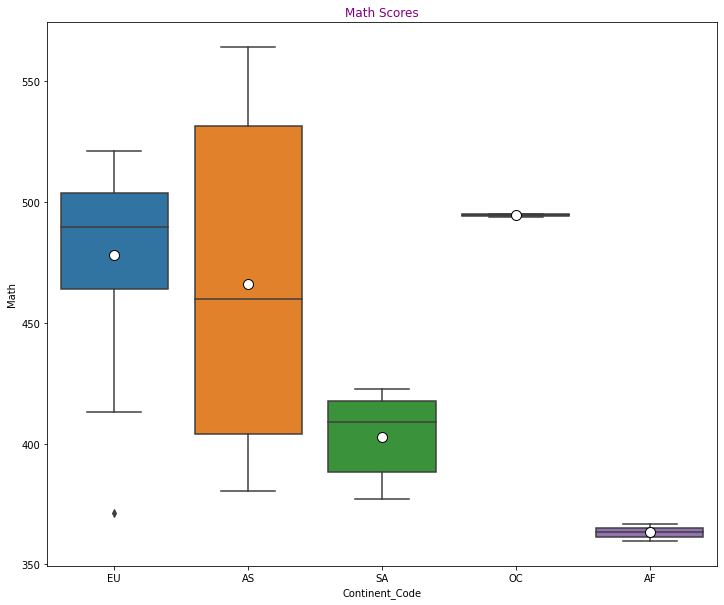

In [23]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=pisa, x='Continent_Code', y='Math', showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white',
                                                                                'markeredgecolor': 'black', 'markersize': '10'}).set_title('Math Scores', color='purple');


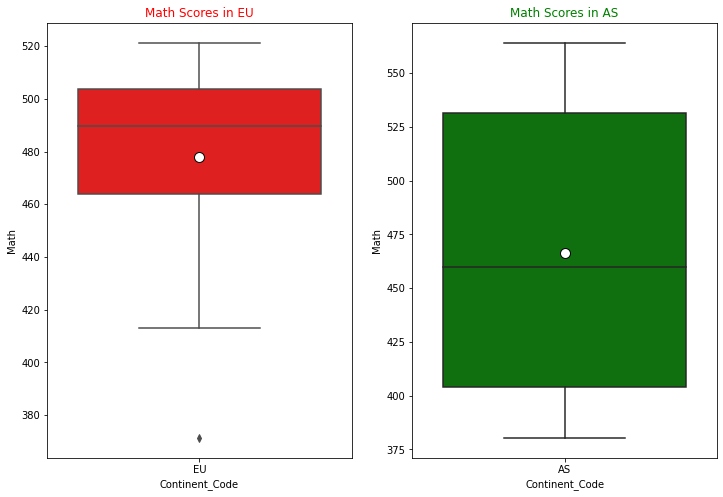

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(data=df_eu, x='Continent_Code', y='Math', ax=ax[0], color='red', showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white',
                                                                                           'markeredgecolor': 'black', 'markersize': '10'}).set_title('Math Scores in EU', color='red')

sns.boxplot(data=df_as, x='Continent_Code', y='Math', ax=ax[1], color='green', showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white',
                                                                                           'markeredgecolor': 'black', 'markersize': '10'}).set_title('Math Scores in AS', color='green');


In [25]:
ttest_ind = stats.ttest_ind(pisa[pisa['Continent_Code']=='EU']['Math'], pisa[pisa['Continent_Code']=='AS']['Math'], equal_var=True, alternative='two-sided')
ttest_ind

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [26]:
ttest_ind.pvalue

0.38826888111307345

In [27]:
ttest_ind.statistic


0.870055317967983

No alpha value is given in the question.
But considering that the value of 0.05 is generally given for alpha;

In [28]:
alpha = 0.05

if ttest_ind.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject the Null")


Fail to reject the Null


CONCLUSION: The p value is higher than the alpha value I accepted (=0.05). In this case, I cannot reject the hypothesis H0 => mu(EU) = mu (AS). As a result, we can say that there is no big difference between the averages of the Math values of the EU and AS continents.